In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import pathlib
from palettable.mycarta import LinearL_5
plt.style.use('science')
home = str(pathlib.Path.home())


In [3]:
df_path = os.path.join(home, "code/project/scripts/xray-luminosity/wr140unabslum.csv")
df = pd.read_csv(df_path)
t_rxte = df['t_rxte'].values
lum_rxte = df['l_rxte'].values
t_nicer = df['t_nicer'].values
lum_nicer = df['l_nicer'].values
t_swiftpc = df['t_swiftpc'].values
lum_swiftpc = df['l_swiftpc'].values
t_swiftwt = df['t_swiftwt'].values
lum_swiftwt = df['l_swiftwt'].values

period = 2895
# Phase fold the RXTE data

t_rxte[t_rxte<-2895/2] = t_rxte[t_rxte<-2895/2] + 2895
t_nicer[t_nicer>2895/2] = t_nicer[t_nicer>2895/2] - 2895
t_swiftpc[t_swiftpc>2895/2] = t_swiftpc[t_swiftpc>2895/2] - 2895
t_swiftwt[t_swiftwt>2895/2] = t_swiftwt[t_swiftwt>2895/2] - 2895

df2 = pd.DataFrame({'t_rxte':t_rxte, 'l_rxte':lum_rxte, 't_nicer':t_nicer, 'l_nicer':lum_nicer, 't_swiftpc':t_swiftpc, 'l_swiftpc':lum_swiftpc, 't_swiftwt':t_swiftwt, 'l_swiftwt':lum_swiftwt})
df2.to_csv(os.path.join(home, "code/project/scripts/xray-luminosity/wr140-phasefolded-unabslum.csv"), index=False)


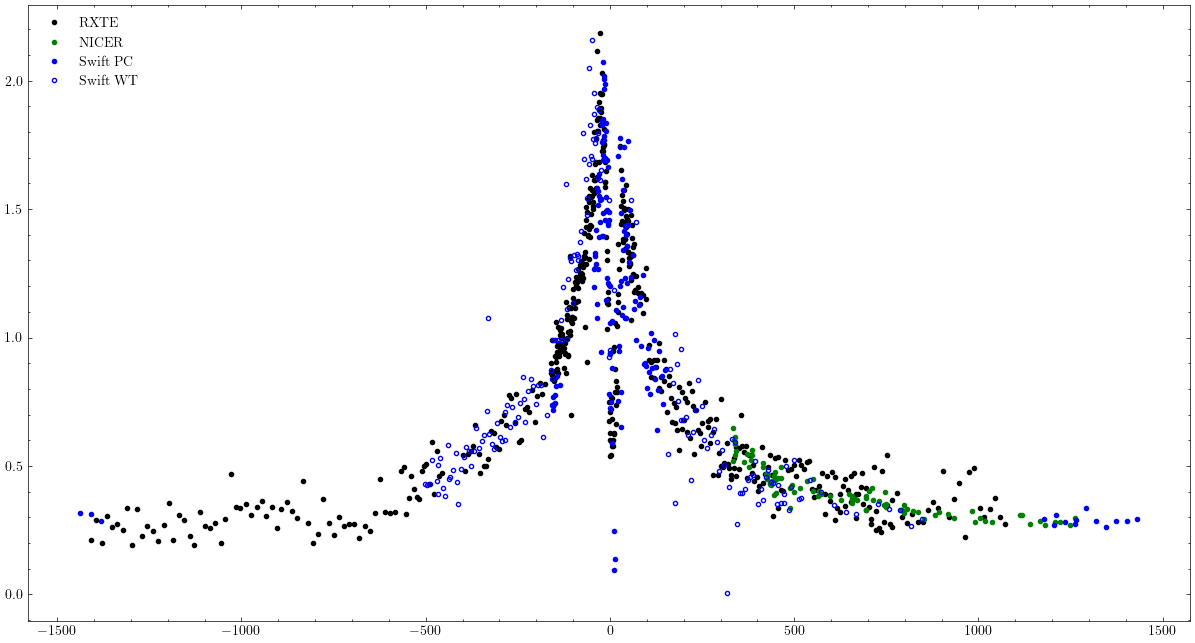

In [4]:
fig, axes = plt.subplots(figsize=(15, 8))
axes.plot(t_rxte, lum_rxte, 'ko', label='RXTE', markersize=3)
axes.plot(t_nicer, lum_nicer, 'go', label='NICER', markersize=3)
axes.plot(t_swiftpc, lum_swiftpc, 'bo',label='Swift PC',markersize=3)
axes.plot(t_swiftwt, lum_swiftwt, 'bo',label='Swift WT', markerfacecolor='none', markersize=3)
axes.legend(loc="upper left")